In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's a CSV file named 'vgu_happiness.csv')
df = pd.read_csv('VGU Student Happiness Survey.csv')

In [2]:
# convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# change the timestamp to the index
df.set_index('Timestamp', inplace=True)

In [3]:
# create new dataframe 
new_df = pd.DataFrame()

# What is your gender?

In [4]:
df["What is your gender?"].dtype

dtype('O')

In [5]:
df["What is your gender?"].value_counts()

What is your gender?
Male      49
Female    22
Name: count, dtype: int64

In [6]:
df["What is your gender?"].isnull().sum()

0

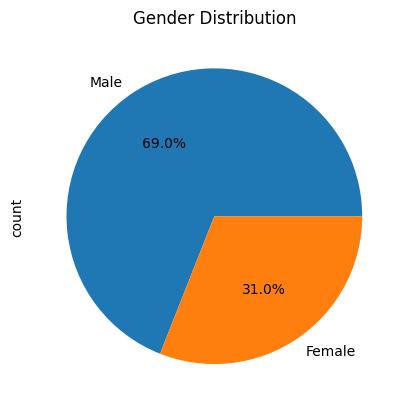

In [7]:
# plot the pie chart

# plot the bar chart of the age distribution
counts = df['What is your gender?'].value_counts()

# display the chart in one line but have space between the chart
# plot the pie chart
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

plt.show()

In [8]:
genders_dummies = pd.get_dummies(df['What is your gender?'])

genders_dummies = genders_dummies.astype(int)

new_df = pd.concat([new_df, genders_dummies])

# What is your age?

In [9]:
df["What is your age? "].dtype

dtype('int64')

In [10]:
df["What is your age? "].value_counts()

What is your age? 
21    33
19    21
20    14
18     2
22     1
Name: count, dtype: int64

In [11]:
# check null values of the column
df["What is your age? "].isnull().sum()

0

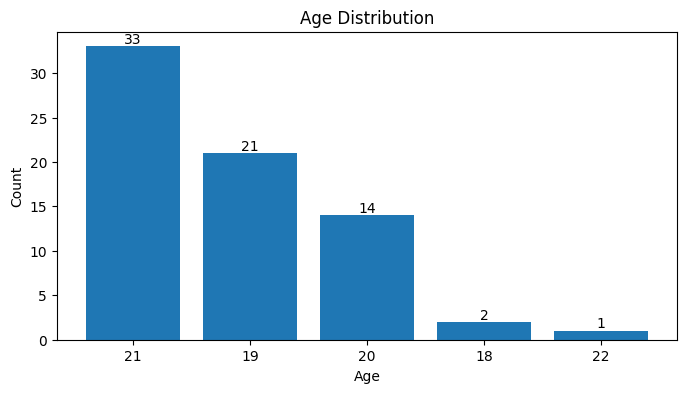

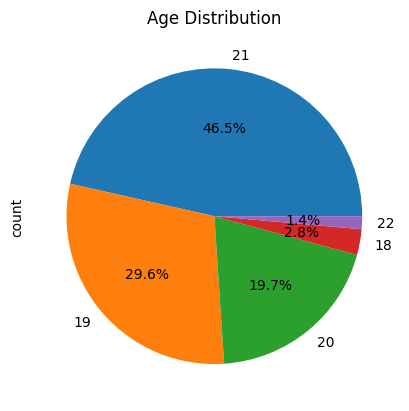

In [12]:
# plot the bar chart of the age distribution
counts = df['What is your age? '].value_counts()

# display the chart in one line but have space between the chart
ax = counts.plot(kind='bar', rot=0, width=0.8, figsize=(8, 4))
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

# plot the pie chart
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Age Distribution")
plt.show()




In [13]:
new_df['Age'] = df['What is your age? ']

# What is your height (in cm)? 

In [14]:
df['What is your height (in cm)? '].dtype

dtype('float64')

In [15]:
df['What is your height (in cm)? '].unique()

array([170.  , 171.  , 174.  , 172.  , 168.  , 154.  , 167.  , 160.  ,
       159.  , 165.  , 164.  , 162.  , 175.  , 173.  , 179.  , 183.  ,
       180.  , 176.  , 163.  , 150.  , 169.  , 175.5 , 178.  , 158.  ,
         1.71, 191.  , 177.  , 155.  , 153.  , 157.  ])

In [16]:
# check null
df['What is your height (in cm)? '].isnull().sum()

0

In [17]:
df['What is your height (in cm)? '] = df['What is your height (in cm)? '].replace(1.71, 171)

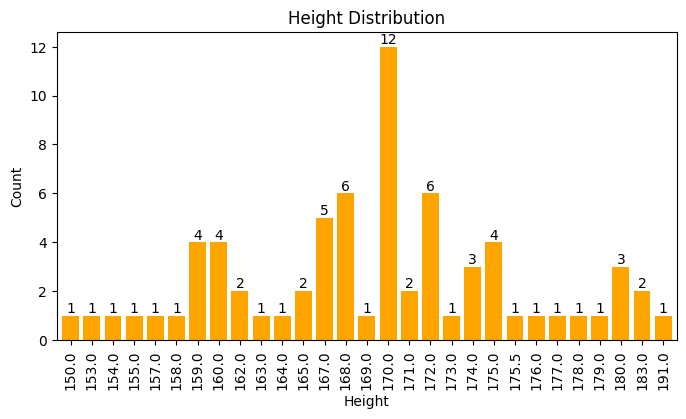

In [18]:
# plot the bar chart of the height distribution
counts = df['What is your height (in cm)? '].value_counts().sort_index()

ax = counts.plot(kind='bar', rot=90, width=0.8, figsize=(8, 4), color='orange')
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")

plt.show()

In [19]:
new_df['Height'] = df['What is your height (in cm)? ']

# What is your weight (in kg)?

In [20]:
df['What is your weight (in kg)?'].dtype

dtype('O')

In [21]:
df['What is your weight (in kg)?'].unique()

array(['70', '65', '72', '78', '80', '54', '66', '52', '50', '58', '60',
       '47', '61', '68', '62', '74', '90', '73', '50kg', '68cm', '59',
       '42', '67', '56', '77', '83', '85', '43', '75', '74.4 kg', '55',
       '71', '49', '51'], dtype=object)

In [22]:
df['What is your weight (in kg)?'] = df['What is your weight (in kg)?'].str.replace('kg', '')

In [23]:
df['What is your weight (in kg)?'] = df['What is your weight (in kg)?'].str.replace('cm', '')

In [24]:
# convert the column to float
df['What is your weight (in kg)?'] = df['What is your weight (in kg)?'].astype(float)

In [25]:
new_df['Weight'] = df['What is your weight (in kg)?']

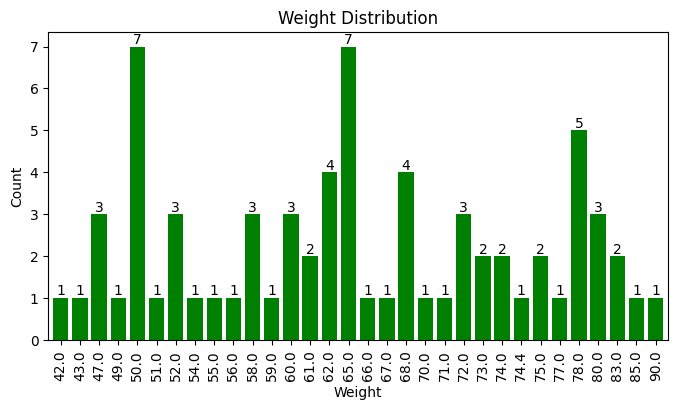

In [26]:
# plot the bar chart of the weight distribution after sorting the values
counts = df['What is your weight (in kg)?'].value_counts().sort_index()

ax = counts.plot(kind='bar', rot=90, width=0.8, figsize=(8, 4), color='green')
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Count")

plt.show()

# What are your main hobbies? (Select all that apply)

In [27]:
# Split hobbies into individual columns, creating dummy variables
hobbies_dummies = df['What are your main hobbies? (Select all that apply)'] \
    .str.get_dummies(sep=', ')

# Concatenate the dummy variables with new_df
new_df = pd.concat([new_df, hobbies_dummies], axis=1)

In [28]:
new_df

,Female,Male,Age,Height,Weight,Art,Gaming,Hacking,Internet Surfing,Learning,Music,Reading,Sports,Watching movies
Timestamp,,,,,,,,,,,,,,
2024-11-25 13:17:46,0,1,21,170.0,70.0,0,1,0,0,0,1,1,1,0
2024-11-25 13:23:19,0,1,21,171.0,65.0,0,1,0,0,0,1,1,1,0
2024-11-25 13:31:59,0,1,21,174.0,72.0,0,0,0,0,0,1,1,1,0
2024-11-25 13:32:06,0,1,21,172.0,78.0,0,0,1,0,0,1,0,1,0
2024-11-25 13:53:09,0,1,21,168.0,80.0,1,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 10:15:57,1,0,19,167.0,52.0,0,0,0,0,0,1,1,1,0
2024-11-30 10:17:15,1,0,20,159.0,47.0,0,0,0,0,0,1,1,0,0
2024-11-30 11:40:52,0,1,21,180.0,50.0,0,1,0,0,0,0,0,1,0


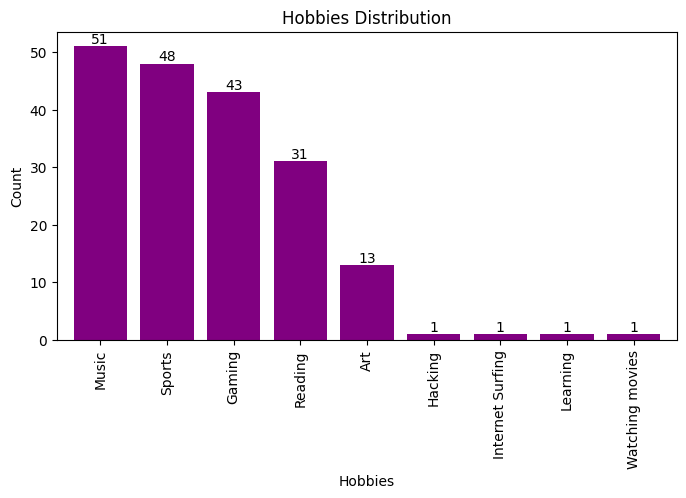

In [29]:

# table of the each hobbies
hobbies_dummies.sum().sort_values(ascending=False)

# plot the bar chart of the hobbies distribution
counts = hobbies_dummies.sum().sort_values(ascending=False)

ax = counts.plot(kind='bar', rot=90, width=0.8, figsize=(8, 4), color='purple')
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.title("Hobbies Distribution")
plt.xlabel("Hobbies")
plt.ylabel("Count")

plt.show()

# Which city are you from?

In [30]:
df['Which city are you from?'].dtype

dtype('O')

In [31]:
df['Which city are you from?'].unique()

array(['Phú Yên', 'Ho Chi Minh', 'Vung Tau', 'Đồng Tháp', 'Vũng Tàu',
       'Quang Nam', 'Hcm', 'Da Nang', 'HCM', 'Binh Duong',
       'Hai Phong city', 'HCMC', 'Ho Chi Minh ', 'Sai Gon',
       'Ho Chi Minh city', 'Bình Dương', 'Vung Tau city', 'Ha Noi',
       'Ho Chi Minh City', 'Vung Tau City', 'ho chi minh', 'HCM city',
       'Nha Trang', 'TP HCM', 'HCM City', 'Thu Dau Mot', 'Dong Nai',
       'Ho-Chi-Minh-Stadt', 'Tay Ninh', 'Hanoi', 'Hồ Chí Minh',
       'An Giang'], dtype=object)

In [32]:
# Mapping dictionary
city_mapping = {
    'Ho Chi Minh City': 'Ho Chi Minh',
    'HCM': 'Ho Chi Minh',
    'HCMC': 'Ho Chi Minh',
    'Sai Gon': 'Ho Chi Minh',
    'ho chi minh': 'Ho Chi Minh',
    'Hồ Chí Minh': 'Ho Chi Minh',
    'HCM city': 'Ho Chi Minh',
    'TP HCM': 'Ho Chi Minh',
    'HCM City': 'Ho Chi Minh',
    'Ho-Chi-Minh-Stadt': 'Ho Chi Minh',
    'Ho Chi Minh city': 'Ho Chi Minh',
    'Hcm': 'Ho Chi Minh',
    'Ho Chi Minh ': 'Ho Chi Minh',
    'Vũng Tàu': 'Vung Tau',
    'Vung Tau city': 'Vung Tau',
    'Vung Tau City': 'Vung Tau',
    'Da Nang': 'Da Nang',
    'Bình Dương': 'Binh Duong',
    'Thu Dau Mot': 'Binh Duong',
    'Hai Phong city': 'Hai Phong',
    'Phú Yên': 'Phu Yen',
    'Đồng Tháp': 'Dong Thap',
    'Hà Nội': 'Ha Noi',
    'Hanoi': 'Ha Noi',
}

# Apply mapping
df['Which city are you from?'] = df['Which city are you from?'].replace(city_mapping)

In [33]:
# check null
df['Which city are you from?'].isnull().sum()

0

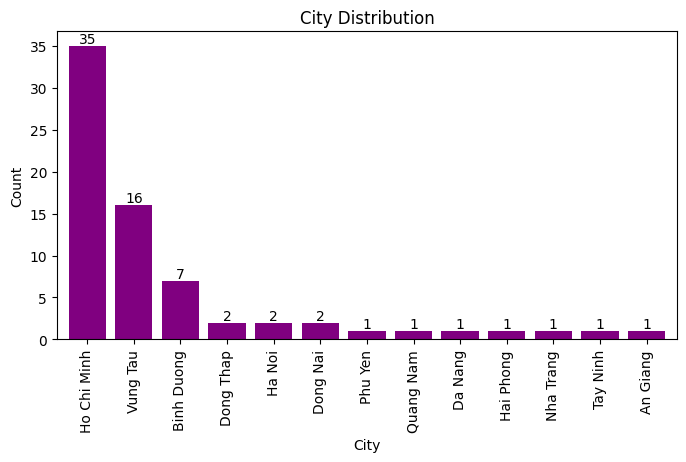

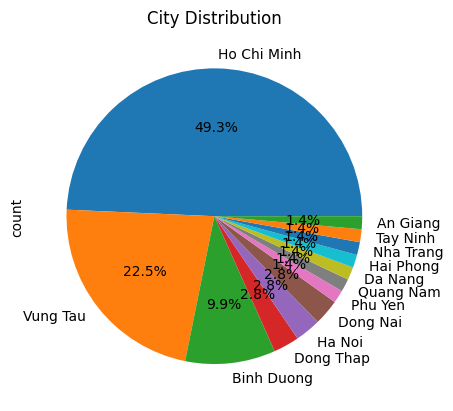

In [34]:
# plot the bar chart of the city distribution
counts = df['Which city are you from?'].value_counts()

ax = counts.plot(kind='bar', rot=90, width=0.8, figsize=(8, 4), color='purple')
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.title("City Distribution")
plt.xlabel("City")
plt.ylabel("Count")

plt.show()

# plot the pie chart
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("City Distribution")
plt.show()

In [35]:
# Split cities into individual columns, creating dummy variables
cities_dummies = pd.get_dummies(df['Which city are you from?'])

cities_dummies = cities_dummies.astype(int)

# Concatenate the dummy variables with new_df
new_df = pd.concat([new_df, cities_dummies], axis=1)

# What is your major? (CSE, ECE, BA, BFA, ...)

In [37]:
df['What is your major? (CSE, ECE, BA, BFA, ...)'].dtype

dtype('O')

In [38]:
df['What is your major? (CSE, ECE, BA, BFA, ...)'].unique()

array(['CSE', 'BFA', 'BBA', 'ARC', 'Cse', 'BCE', 'MEN', 'cse', 'ECE'],
      dtype=object)

In [36]:
# Mapping dictionary
major_mapping = {
    'cse': 'CSE',
    'Cse': 'CSE'
}

# Apply mapping
df['What is your major? (CSE, ECE, BA, BFA, ...)'] = df['What is your major? (CSE, ECE, BA, BFA, ...)'].replace(major_mapping)

In [40]:
# check null
df['What is your major? (CSE, ECE, BA, BFA, ...)'].isnull().sum()

0

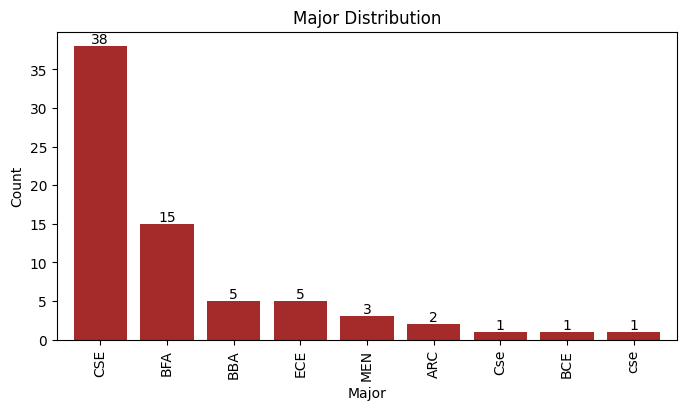

In [41]:
# plot the bar chart of the major distribution
counts = df['What is your major? (CSE, ECE, BA, BFA, ...)'].value_counts()

ax = counts.plot(kind='bar', rot=90, width=0.8, figsize=(8, 4), color='brown')
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.title("Major Distribution")
plt.xlabel("Major")
plt.ylabel("Count")

plt.show()

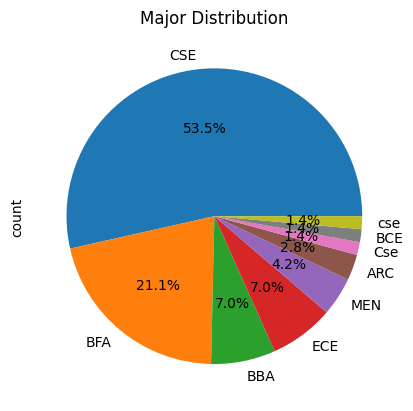

In [42]:
# plot the pie chart
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Major Distribution")
plt.show()

In [43]:
# Split majors into individual columns, creating dummy variables
majors_dummies = pd.get_dummies(df['What is your major? (CSE, ECE, BA, BFA, ...)'])

majors_dummies = majors_dummies.astype(int)

# Concatenate the dummy variables with new_df
new_df = pd.concat([new_df, majors_dummies], axis=1)

# What is your current living situation?

In [45]:
df['What is your current living situation?'].unique()

array(['University dormitory', 'Home with family',
       'Rental apartment/house', 'Nhà trọ',
       'I live in both the dorm and at home'], dtype=object)

In [46]:
# mapping dictionary
living_mapping = {
    'Nhà trọ': 'Rental apartment/house'
}

# apply mapping
df['What is your current living situation?'] = df['What is your current living situation?'].replace(living_mapping)

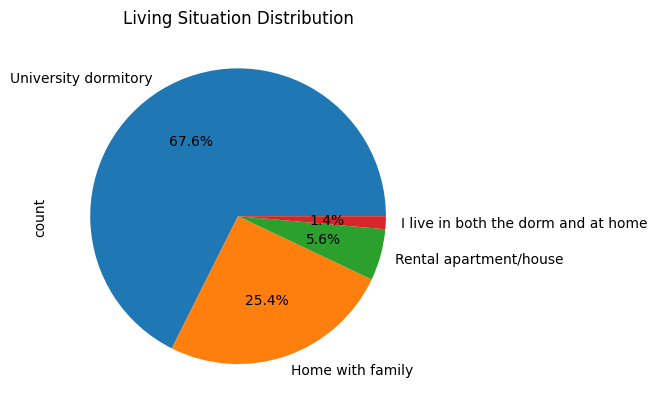

In [47]:
# pie chart
counts = df['What is your current living situation?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Living Situation Distribution")
plt.show()

In [48]:
# Create dummy variables for the living situation
living_dummies = pd.get_dummies(df['What is your current living situation?'])

living_dummies = living_dummies.astype(int)

# Concatenate the dummy variables with new_df
new_df = pd.concat([new_df, living_dummies], axis=1)

# Levels Of Happiness and Satisfaction

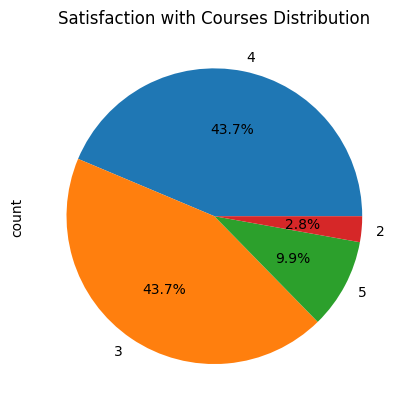

In [49]:
new_df['Satisfaction with Courses'] = df['How satisfied are you with your courses this semester?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with your courses this semester?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Satisfaction with Courses Distribution")
plt.show()

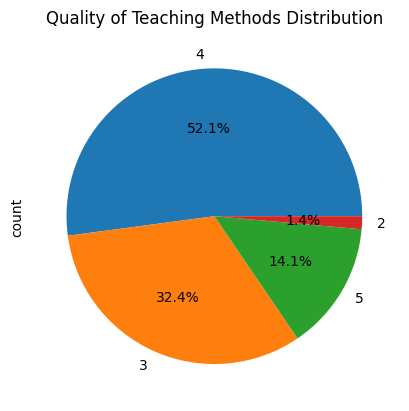

In [51]:
# df['How would you rate the overall quality of teaching methods?']
new_df['Quality of Teaching Methods'] = df['How would you rate the overall quality of teaching methods?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How would you rate the overall quality of teaching methods?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Quality of Teaching Methods Distribution")
plt.show()

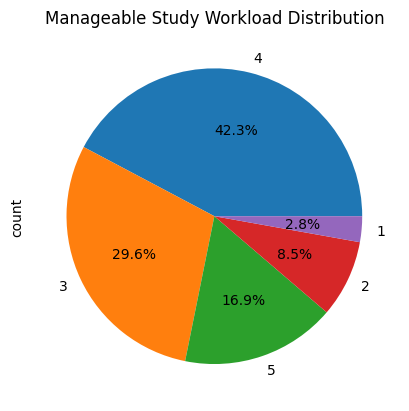

In [52]:
# df['How manageable is your current study workload?']
new_df['Manageable Study Workload'] = df['How manageable is your current study workload?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How manageable is your current study workload?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Manageable Study Workload Distribution")
plt.show()

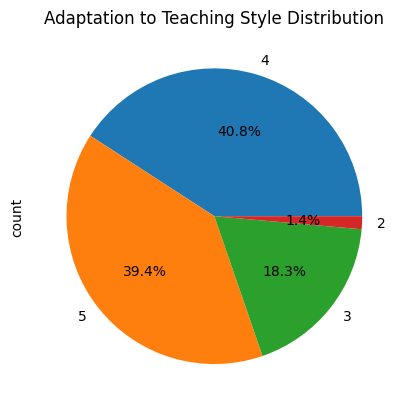

In [53]:
# df['How well have you adapted to the German-Vietnamese teaching style?']
new_df['Adaptation to Teaching Style'] = df['How well have you adapted to the German-Vietnamese teaching style?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How well have you adapted to the German-Vietnamese teaching style?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Adaptation to Teaching Style Distribution")
plt.show()

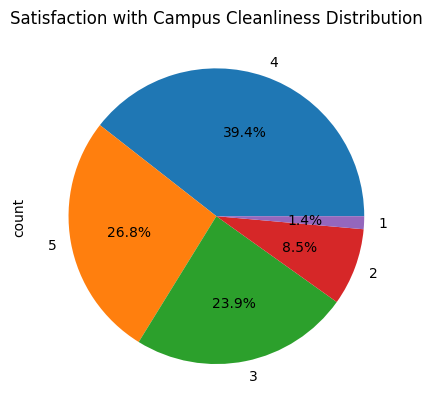

In [54]:
# df['How satisfied are you with campus cleanliness?']
new_df['Satisfaction with Campus Cleanliness'] = df['How satisfied are you with campus cleanliness?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with campus cleanliness?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Satisfaction with Campus Cleanliness Distribution")
plt.show()


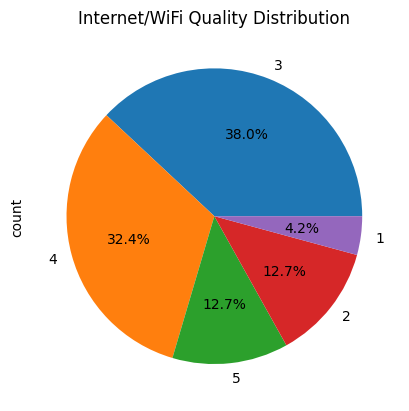

In [55]:
# df['How would you rate the internet/WiFi quality on campus?']
new_df['Internet/WiFi Quality'] = df['How would you rate the internet/WiFi quality on campus?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How would you rate the internet/WiFi quality on campus?'].value_counts()

counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Internet/WiFi Quality Distribution")
plt.show()

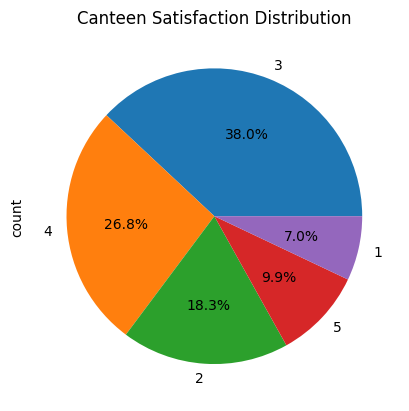

In [56]:
# df['Rate your satisfaction with the canteen (Food quality)']
new_df['Canteen Satisfaction'] = df['Rate your satisfaction with the canteen (Food quality)'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['Rate your satisfaction with the canteen (Food quality)'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Canteen Satisfaction Distribution")
plt.show()

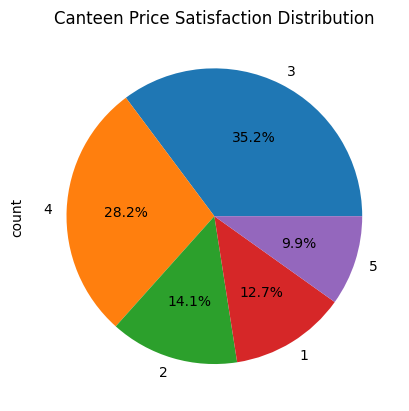

In [57]:
# df['Rate your satisfaction with the canteen (Food price)']
new_df['Canteen Price Satisfaction'] = df['Rate your satisfaction with the canteen (Food price)'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['Rate your satisfaction with the canteen (Food price)'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Canteen Price Satisfaction Distribution")
plt.show()

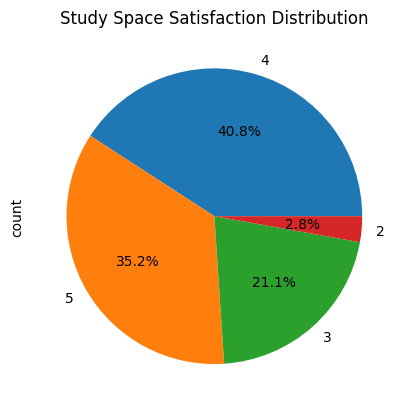

In [58]:
# df['How satisfied are you with the availability of study spaces?']
new_df['Study Space Satisfaction'] = df['How satisfied are you with the availability of study spaces?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with the availability of study spaces?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Study Space Satisfaction Distribution")
plt.show()

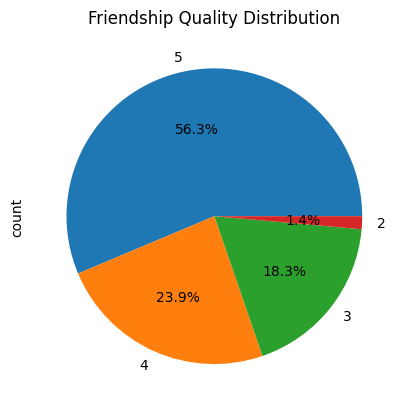

In [59]:
# df['How would you rate the quality of friendships you've made at VGU?']
new_df['Friendship Quality'] = df['How would you rate the quality of friendships you\'ve made at VGU?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How would you rate the quality of friendships you\'ve made at VGU?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Friendship Quality Distribution")
plt.show()

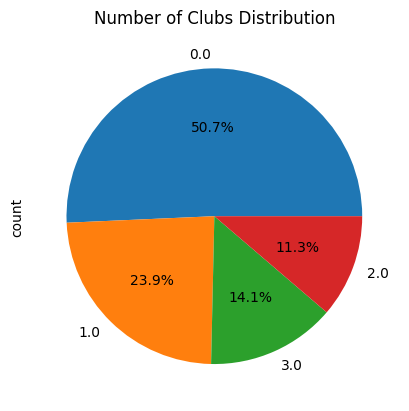

In [60]:
# df['How many student clubs are you actively involved in?']
df['How many student clubs are you actively involved in?'] = df['How many student clubs are you actively involved in?'].fillna(0)
new_df['Number of Clubs'] = df['How many student clubs are you actively involved in?'].astype(int)

# pie chart
counts = df['How many student clubs are you actively involved in?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Number of Clubs Distribution")
plt.show()

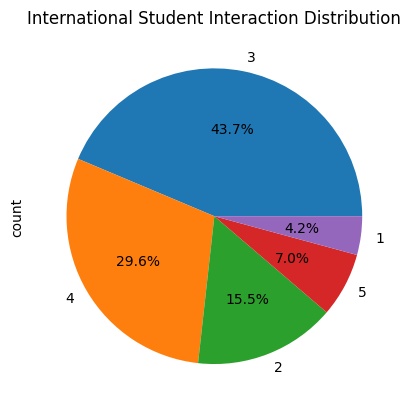

In [61]:
# df['How satisfied are you with your interactions with international students?']
new_df['International Student Interaction'] = df['How satisfied are you with your interactions with international students?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with your interactions with international students?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("International Student Interaction Distribution")
plt.show()


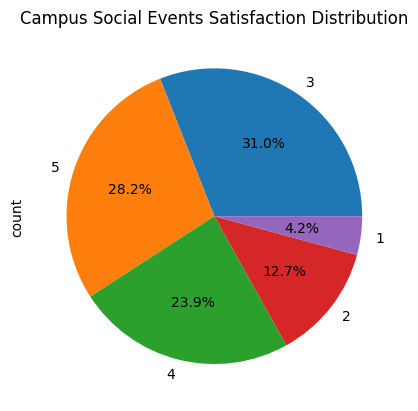

In [62]:
# df['How satisfied are you with campus social events?']
new_df['Campus Social Events Satisfaction'] = df['How satisfied are you with campus social events?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with campus social events?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Campus Social Events Satisfaction Distribution")
plt.show()

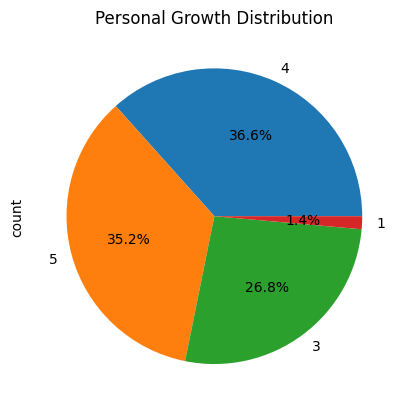

In [63]:
# How much personal growth have you experienced at VGU?
new_df['Personal Growth'] = df['How much personal growth have you experienced at VGU?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How much personal growth have you experienced at VGU?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Personal Growth Distribution")
plt.show()

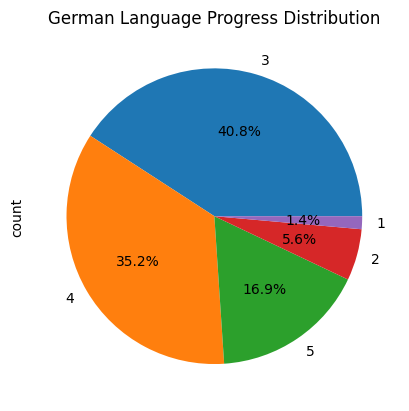

In [64]:
# How satisfied are you with your German language progress?
new_df['German Language Progress'] = df['How satisfied are you with your German language progress?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with your German language progress?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("German Language Progress Distribution")
plt.show()

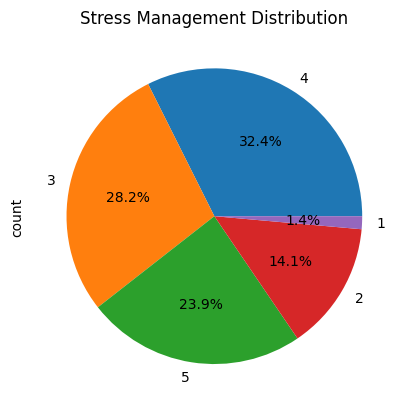

In [65]:
# How well do you manage your stress levels?
new_df['Stress Management'] = df['How well do you manage your stress levels?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How well do you manage your stress levels?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Stress Management Distribution")
plt.show()

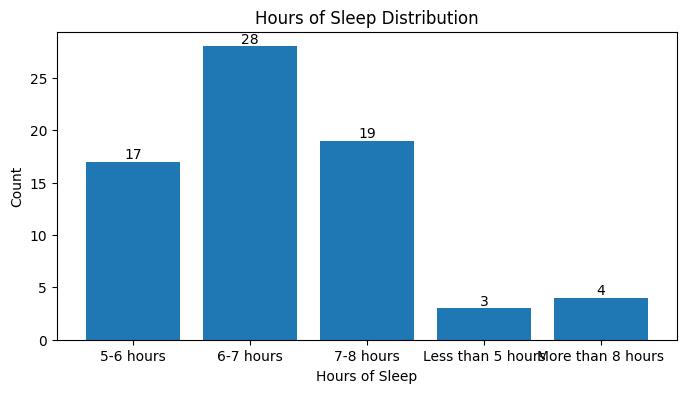

In [66]:
# number of hours of sleep create dummy variables
sleep_dummies = pd.get_dummies(df['On average, how many hours of sleep do you get per night?'])

sleep_dummies = sleep_dummies.astype(int)

# Concatenate the dummy variables with new_df
new_df = pd.concat([new_df, sleep_dummies], axis=1)

# table of the hours of sleep
counts = df['On average, how many hours of sleep do you get per night?'].value_counts().sort_index()
ax = counts.plot(kind='bar', rot=0, width=0.8, figsize=(8, 4))
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.title("Hours of Sleep Distribution")
plt.xlabel("Hours of Sleep")
plt.ylabel("Count")
plt.show()

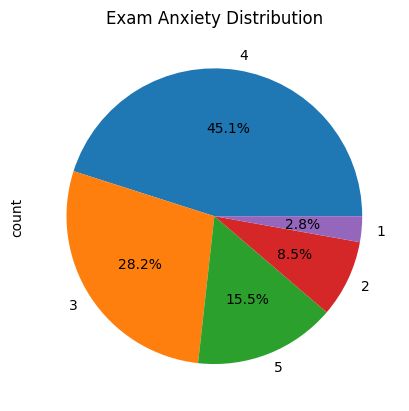

In [67]:
# How would you rate your exam anxiety levels?
new_df['Exam Anxiety'] = df['How would you rate your exam anxiety levels?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How would you rate your exam anxiety levels?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Exam Anxiety Distribution")
plt.show()

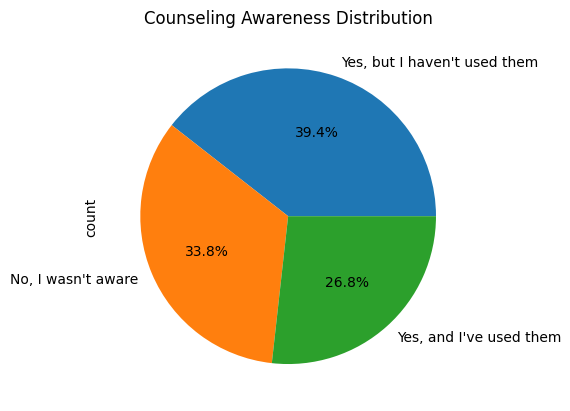

In [69]:
# Are you aware of VGU's counseling services? create dummy variables
counseling_dummies = pd.get_dummies(df["Are you aware of VGU's counseling services?"])

counseling_dummies = counseling_dummies.astype(int)

# Concatenate the dummy variables with new_df
new_df = pd.concat([new_df, counseling_dummies], axis=1)

# pie chart
counts = df["Are you aware of VGU's counseling services?"].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Counseling Awareness Distribution")
plt.show()

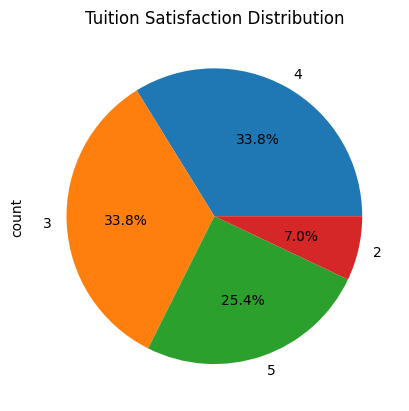

In [70]:
# How satisfied are you with the tuition fees considering the education quality?
new_df['Tuition Satisfaction'] = df['How satisfied are you with the tuition fees considering the education quality?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with the tuition fees considering the education quality?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Tuition Satisfaction Distribution")
plt.show()

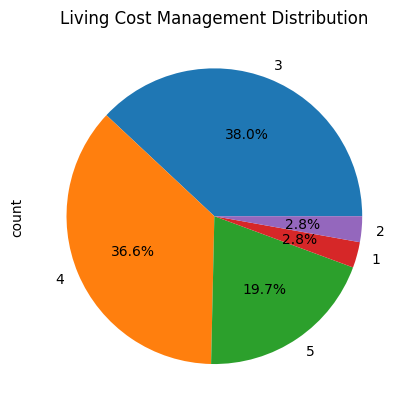

In [71]:
# How well are you managing your living costs?
new_df['Living Cost Management'] = df['How well are you managing your living costs?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How well are you managing your living costs?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Living Cost Management Distribution")
plt.show()

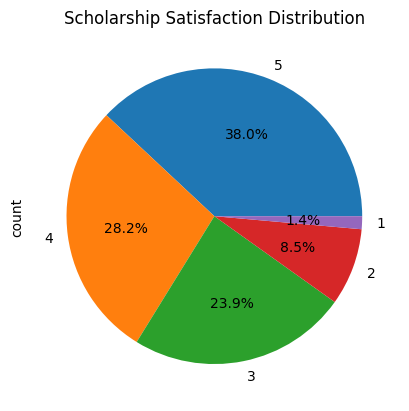

In [72]:
# How satisfied are you with scholarship opportunities at VGU?
new_df['Scholarship Satisfaction'] = df['How satisfied are you with scholarship opportunities at VGU?'].apply(lambda x: 1 if x >= 3 else 0)

# pie chart
counts = df['How satisfied are you with scholarship opportunities at VGU?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Scholarship Satisfaction Distribution")
plt.show()

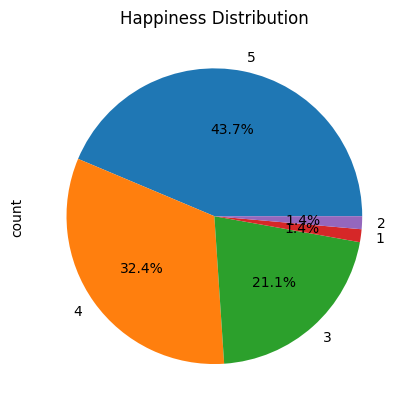

In [73]:
# Overall, how happy are you as a VGU student?
new_df['Happiness'] = df['Overall, how happy are you as a VGU student?']

# pie chart
counts = df['Overall, how happy are you as a VGU student?'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Happiness Distribution")
plt.show()

In [74]:
# save the new dataframe to a CSV file
new_df.to_csv('vgu_happiness_cleaned.csv', index=False)